In [1]:
##CANADA GDP ANALYSIS##

##IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing


In [2]:
##LOAD CLEAN DATA

#This defines the dataframe (df) and will use the Pandas function 'read_excel' to access the data in the .CSV File
df = pd.read_excel(r'C:\Users\danhe\OneDrive\Data Science BSC\Professional Practice\Projects\Idea 1 - Cannabis Legislisation in Canada\Canada GDP\Canada GDP - CLEAN.xlsx', sheet_name='Sheet1', skiprows=0)

print(df.columns.tolist()) #CHECK THE COLUMN HEADERS - IMPORTANT FOR REST OF SCRIPT THAT THEY MATCH THE years and NAICS definitions



['NAICS', 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [3]:
##PERFORM DATA CLEANSING TASKS
#Set NAICS as Index Column
df = df.set_index('NAICS')

#Transpose years from columns to rows
df_clean = df.transpose()

#Convert years to datetime
df_clean.index = pd.to_datetime(df_clean.index, format ='%Y')

#Define frequency as Year Start
df.index.freq = 'AS'

#Return all valid column names for NAICS
print("Cleaned Columns (Industries):")
print(df_clean.columns.tolist())

Cleaned Columns (Industries):
['All industries', 'Goods-producing industries', 'Service-producing industries', 'Business sector industries', 'Non-business sector industries', 'Industrial production', 'Non-durable manufacturing industries', 'Durable manufacturing industries', 'Information and communication technology sector', 'Energy sector', 'Industrial production (1950 definition)', 'Public Sector', 'Content and media sector', 'All industries (except cannabis sector)', 'Cannabis sector', 'All industries (except unlicensed cannabis sector)', 'Agriculture, forestry, fishing and hunting', 'Mining, quarrying, and oil and gas extraction', 'Utilities', 'Construction', 'Manufacturing', 'Wholesale trade', 'year', 'Transportation and warehousing', 'Information and cultural industries', 'Finance and insurance', 'Real estate and rental and leasing', 'Professional, scientific and technical services', 'Management of companies and enterprises', 'Administrative and support, waste management and reme

In [6]:
#Define industries based on NAICS data
gdp_all = df_clean['All industries'].values
gdp_cannabis = df_clean['Cannabis sector'].values
gdp_rest = df_clean['All industries (except cannabis sector)'].values

In [7]:
##DEFINE TIME SERIES ANALYSIS DEFINITIONS

ts_all = df_clean['All industries']
ts_cannabis = df_clean['Cannabis sector']
ts_rest = df_clean['All industries (except cannabis sector)']

In [8]:
##PERFORM 5 YEAR FORECAST

last_year = df_clean.index.year[-1]
forecast_years = list(range(last_year + 1, last_year +6))

def forecast_series(ts, steps=5):
    #EXPONTENTIAL SMOOTHING CARRIED OUT ON DATA
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)
    fit = model.fit()
    forecast = fit.forecast(steps)
    return forecast

forecast_all = forecast_series(ts_all)
forecast_cannabis = forecast_series(ts_cannabis)
forecast_rest = forecast_series(ts_rest)

#Print to check outputs
print(f"Forecasting for years: {forecast_years}")
print(forecast_cannabis)

Forecasting for years: [2026, 2027, 2028, 2029, 2030]
2026-01-01     8389.373466
2027-01-01     8853.746925
2028-01-01     9318.120385
2029-01-01     9782.493844
2030-01-01    10246.867303
Freq: YS-JAN, dtype: float64


C:\Data Science Projects\Cannabis and Canada\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Data Science Projects\Cannabis and Canada\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Data Science Projects\Cannabis and Canada\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [9]:
##COMBINE ACTUAL AND FORECAST DATA FOR PRESENTING BACK

years_int = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]  # 9 years
forecast_years = [2026, 2027, 2028, 2029, 2030]  # 5 years
# ts_all should have 9 values, forecast_all should have 5 values
all_years = years_int + forecast_years  # 14 years
all_gdp = list(ts_all) + list(forecast_all)  # 14 values
cannabis_gdp = list(ts_cannabis) + list(forecast_cannabis)
rest_gdp = list(ts_rest) + list(forecast_rest)

In [10]:
##PLOT DEBUG

print(len(all_years), len(all_gdp))
print(all_years)
print(all_gdp)

14 14
[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
[1996019, 2054500, 2097225, 1986260, 2101011, 2201010, 2228857, 2270922, 2292223, 2329108.182860252, 2367641.68290117, 2406175.1829420887, 2444708.6829830073, 2483242.1830239254]


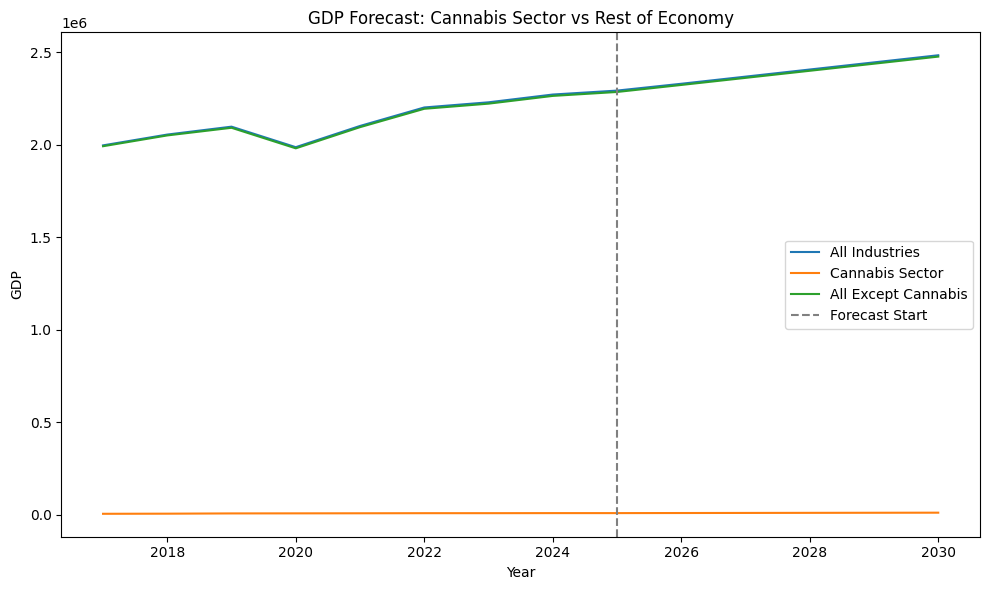

In [11]:
##PLOT RESULTS

plt.figure(figsize=(10,6))
plt.plot(all_years, all_gdp, label='All Industries')
plt.plot(all_years, cannabis_gdp, label='Cannabis Sector')
plt.plot(all_years, rest_gdp, label='All Except Cannabis')
plt.axvline(years_int[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('GDP Forecast: Cannabis Sector vs Rest of Economy')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
##IMPACT ASSESSMENT
impact = pd.Series(cannabis_gdp) / pd.Series(all_gdp)
print("Projected cannabis sector share of GDP for next 5 years:")
for year, pct in zip(forecast_years, impact[-5:]):
    print(f"{year}: {pct:.4%}")

Projected cannabis sector share of GDP for next 5 years:
2026: 0.3602%
2027: 0.3739%
2028: 0.3873%
2029: 0.4001%
2030: 0.4126%
